# weather prediction:
### Data Cleaning, Preprocessing, Data Visualization, Evaluation, Algorithms and Machine Learning


In [2]:
## importing the necessary libraries ##

import numpy as np
import pandas as pd

# for visualization 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
 
#for Training and evaluating the model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [3]:
#importing our dataset
weather_df = pd.read_csv('NYweather.csv', index_col="DATE")
print("the size of ur data is",weather_df.shape[0])
weather_df.head()

the size of ur data is 8170


,STATION,NAME,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,SNWD,TAVG,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
DATE,,,,,,,,,,,,,,,,,,,,,
2000-05-01,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",10.07,1534.0,1533.0,0.04,NaN,0.0,0.0,46.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-02,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",10.07,1329.0,1341.0,0.13,NaN,0.0,0.0,56.0,...,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-03,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",9.17,923.0,907.0,0.00,NaN,0.0,0.0,52.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-04,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",12.08,1536.0,1535.0,0.00,NaN,NaN,NaN,57.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN
2000-05-05,USW00004781,"ISLIP LI MACARTHUR AIRPORT, NY US",7.38,2000.0,2000.0,0.00,NaN,0.0,0.0,69.0,...,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
weather_df.describe()

,AWND,FMTM,PGTM,PRCP,PSUN,SNOW,SNWD,TAVG,TMAX,TMIN,...,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22,WV03
count,8167.000000,4160.000000,4000.000000,8169.000000,2.000000,7362.000000,7406.000000,5357.000000,8170.000000,8170.000000,...,1990.0,393.0,6.0,1939.0,30.0,365.0,38.0,44.0,49.0,9.0
mean,9.208251,1372.326442,1344.585750,0.125064,9.000000,0.095273,0.414866,54.000933,61.846389,45.498409,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
std,3.780571,575.904318,569.383902,0.382530,1.414214,0.876202,2.007176,16.808131,17.391386,16.949590,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.000000,0.000000,0.000000,8.000000,0.000000,0.000000,0.000000,12.000000,0.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
25%,6.490000,1108.000000,1043.000000,0.000000,8.500000,0.000000,0.000000,41.000000,48.000000,32.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
50%,8.500000,1410.000000,1358.000000,0.000000,9.000000,0.000000,0.000000,55.000000,63.000000,46.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
75%,11.180000,1646.000000,1644.000000,0.050000,9.500000,0.000000,0.000000,69.000000,77.000000,60.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
max,33.330000,9999.000000,2359.000000,13.510000,10.000000,23.500000,25.000000,88.000000,101.000000,80.000000,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


In [5]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8170 entries, 2000-05-01 to 2022-09-12
Data columns (total 38 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8170 non-null   object 
 1   NAME     8170 non-null   object 
 2   AWND     8167 non-null   float64
 3   FMTM     4160 non-null   float64
 4   PGTM     4000 non-null   float64
 5   PRCP     8169 non-null   float64
 6   PSUN     2 non-null      float64
 7   SNOW     7362 non-null   float64
 8   SNWD     7406 non-null   float64
 9   TAVG     5357 non-null   float64
 10  TMAX     8170 non-null   int64  
 11  TMIN     8170 non-null   int64  
 12  TSUN     745 non-null    float64
 13  WDF2     8167 non-null   float64
 14  WDF5     8129 non-null   float64
 15  WESD     3897 non-null   float64
 16  WSF2     8167 non-null   float64
 17  WSF5     8131 non-null   float64
 18  WT01     3594 non-null   float64
 19  WT02     659 non-null    float64
 20  WT03     518 non-null    float64
 21  WT04

In [6]:
#to get the percentage of the null data
weather_df.apply(pd.isnull).sum()/weather_df.shape[0]

STATION    0.000000
NAME       0.000000
AWND       0.000367
FMTM       0.490820
PGTM       0.510404
PRCP       0.000122
PSUN       0.999755
SNOW       0.098898
SNWD       0.093513
TAVG       0.344308
TMAX       0.000000
TMIN       0.000000
TSUN       0.908813
WDF2       0.000367
WDF5       0.005018
WESD       0.523011
WSF2       0.000367
WSF5       0.004774
WT01       0.560098
WT02       0.919339
WT03       0.936597
WT04       0.983721
WT05       0.955936
WT06       0.991922
WT07       0.979315
WT08       0.860832
WT09       0.988862
WT11       0.999021
WT13       0.756426
WT14       0.951897
WT15       0.999266
WT16       0.762668
WT17       0.996328
WT18       0.955324
WT19       0.995349
WT21       0.994614
WT22       0.994002
WV03       0.998898
dtype: float64

### Preprocessing the data

In [7]:
### feature selection
#focusing on the 5 core values in the weather data & renaming them
core = weather_df[["PRCP", "SNOW", "SNWD", "TMAX", "TMIN"]].copy()
core.columns = ["Precipitation", "Snow", "Snow_depth", "Max_temp", "Min_temp"]
core

print("the size of ur data is:",core.shape[0] ,"\n\nthe null values in ur data is:\n", core.isnull().sum()) 

the size of ur data is: 8170 

the null values in ur data is:
 Precipitation      1
Snow             808
Snow_depth       764
Max_temp           0
Min_temp           0
dtype: int64


In [8]:
#we will look at our data values to know how to fill the nulls 
print(" Precipitation values\n",core["Precipitation"].value_counts(),
      "\n\n Snow values\n",core["Snow"].value_counts()
    ,"\n\n Snow_depth values\n",core["Snow_depth"].value_counts())

 Precipitation values
 0.00    5399
0.01     268
0.02     186
0.03     140
0.04     101
        ... 
2.06       1
1.82       1
1.36       1
1.67       1
4.47       1
Name: Precipitation, Length: 229, dtype: int64 

 Snow values
 0.0     7080
0.1       36
0.2       28
0.4       15
0.3       15
        ... 
2.9        1
14.0       1
3.6        1
11.1       1
23.5       1
Name: Snow, Length: 75, dtype: int64 

 Snow_depth values
 0.0     6901
2.0       56
1.0       55
3.0       43
1.2       37
6.0       25
4.0       23
5.1       22
11.0      22
5.0       22
3.1       18
9.1       18
9.8       15
7.9       14
7.0       12
13.0      12
3.9       12
5.9       11
12.0      10
8.0       10
14.0       9
15.0       9
7.1        7
11.8       6
9.0        5
22.0       4
10.0       4
14.2       3
18.0       3
16.1       3
16.9       3
18.1       2
24.0       2
22.8       1
16.0       1
18.9       1
20.9       1
25.0       1
19.0       1
20.0       1
20.1       1
Name: Snow_depth, dtype: int64


In [9]:
#filling the null values
core["Precipitation"] = core["Precipitation"].fillna(0)
core["Snow"] = core["Snow"].fillna(value=core["Snow"].mean())
core["Snow_depth"] = core["Snow_depth"].fillna(value=core["Snow_depth"].median())
core.isnull().sum()

Precipitation    0
Snow             0
Snow_depth       0
Max_temp         0
Min_temp         0
dtype: int64

In [10]:
#makes dealing with the data easier  
core.index = pd.to_datetime(core.index)

### features visualization to find correlations between them

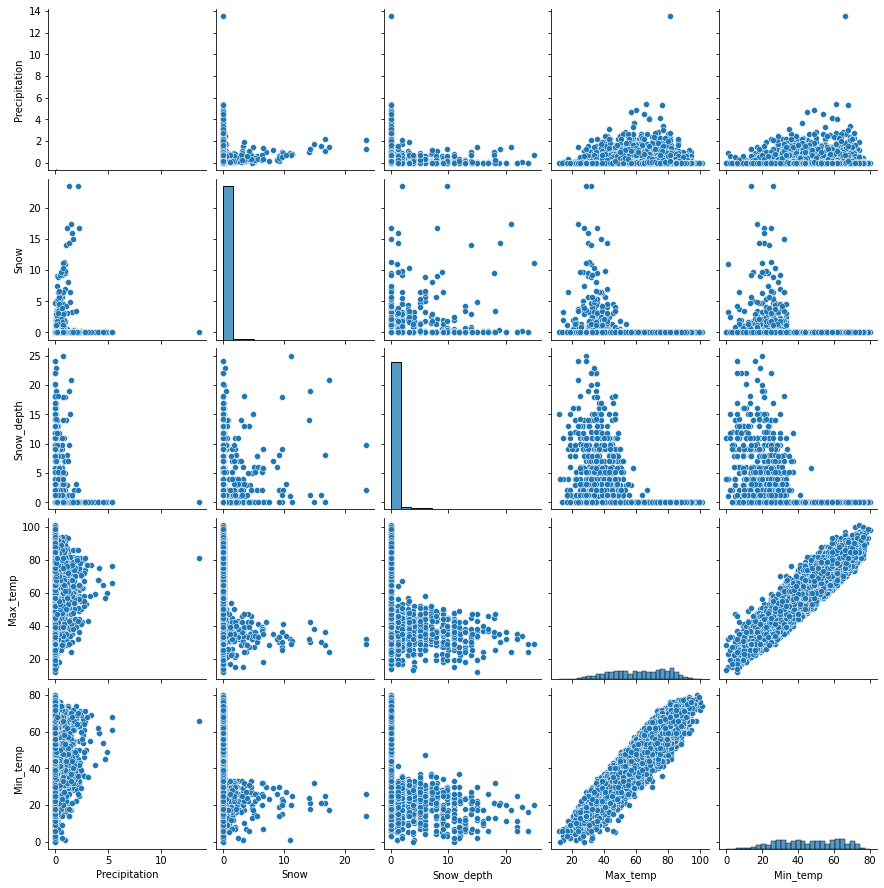

In [11]:
sns.pairplot(core)

<AxesSubplot:xlabel='DATE'>

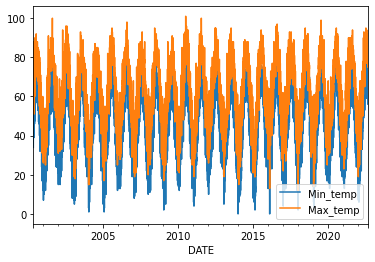

In [12]:
core[["Min_temp", "Max_temp"]].plot()

<AxesSubplot:xlabel='DATE'>

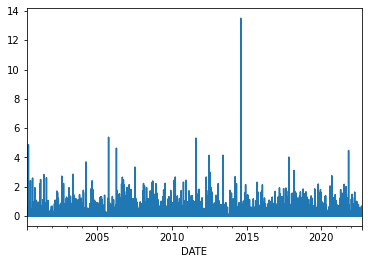

In [13]:
core['Precipitation'].plot()

<AxesSubplot:xlabel='DATE'>

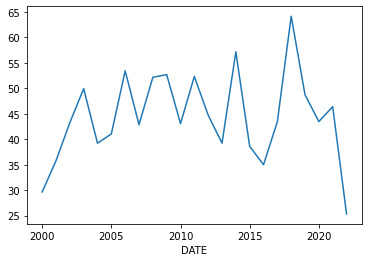

In [14]:
core.groupby(core.index.year).apply(lambda x: x["Precipitation"].sum()).plot()

<AxesSubplot:>

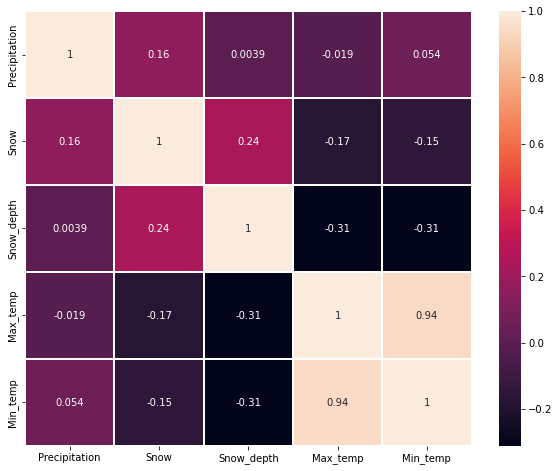

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(core.corr(),annot=True,linewidths=2)

In [16]:
#our goal is to predict tommorrow's max tempreture
core["target"] = core.shift(-1)["Max_temp"]
core = core.iloc[:-1,:].copy()

In [17]:
columnList = list(core.columns) #making a list of columns names
columns_len = len(columnList) # lenght of the list
columnList

['Precipitation', 'Snow', 'Snow_depth', 'Max_temp', 'Min_temp', 'target']

In [18]:
X = core[columnList[0:columns_len-1]]
y = core[columnList[columns_len-1]]

In [19]:
X

,Precipitation,Snow,Snow_depth,Max_temp,Min_temp
DATE,,,,,
2000-05-01,0.04,0.000000,0.0,58,34
2000-05-02,0.13,0.000000,0.0,66,45
2000-05-03,0.00,0.000000,0.0,62,41
2000-05-04,0.00,0.095273,0.0,63,50
2000-05-05,0.00,0.000000,0.0,84,53
...,...,...,...,...,...
2022-09-07,0.00,0.000000,0.0,75,66
2022-09-08,0.00,0.000000,0.0,78,62
2022-09-09,0.00,0.000000,0.0,79,56


In [20]:
y

DATE
2000-05-01    66.0
2000-05-02    62.0
2000-05-03    63.0
2000-05-04    84.0
2000-05-05    85.0
              ... 
2022-09-07    78.0
2022-09-08    79.0
2022-09-09    85.0
2022-09-10    78.0
2022-09-11    81.0
Name: target, Length: 8169, dtype: float64

In [21]:
print("Features set size",X.shape)
print("Variable set size", y.shape)

Features set size (8169, 5)
Variable set size (8169,)


### Training the model

In [22]:
X_train, X_test,y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [23]:
print("Training Featuers set size", X_train.shape)
print("Testing Featuers set size", X_test.shape)
print("Training Variable set size", y_train.shape)
print("Testing Variable set size", y_test.shape)

Training Featuers set size (6535, 5)
Testing Featuers set size (1634, 5)
Training Variable set size (6535,)
Testing Variable set size (1634,)


In [24]:
reg_model = LinearRegression()
reg_model.fit(X_train,y_train)

LinearRegression()

In [25]:
predictions = reg_model.predict(X_test)
print("type of the Predicted object:", type(predictions))
print("Size of the predicted object", predictions.shape)

type of the Predicted object: <class 'numpy.ndarray'>
Size of the predicted object (1634,)


### Evaluating the model

In [26]:
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 5.244016088396961
Mean square error (MSE): 45.8968765677218
Root mean square error (RMSE): 6.774723357283439


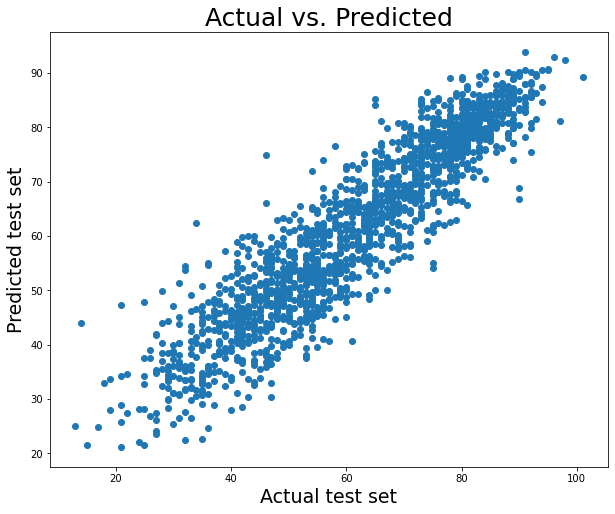

In [27]:
plt.figure(figsize=(10,8))
plt.title("Actual vs. Predicted",fontsize=25)
plt.xlabel("Actual test set",fontsize=19)
plt.ylabel("Predicted test set",fontsize=19)
plt.scatter(x=y_test,y=predictions)

C:\Users\pc\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

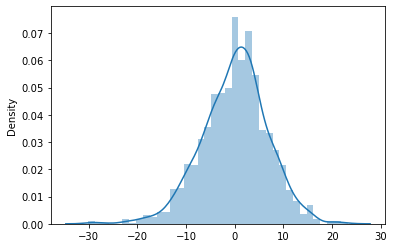

In [28]:
sns.distplot([y_test-predictions])